In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [6]:
# add preprocessing layer to the front of DenseNet
densenet = DenseNet169(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

51888128/51877672 [==============================] - 9s 0us/step


In [7]:
new_train_path = './sample_6/train/'
new_val_path = './sample_6/validation/'
new_test_path = './sample_6/test/'


# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [8]:
# Number of classes
folders = glob(new_train_path+'*')
# my layers
x = Flatten()(densenet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating a model object
model = Model(inputs=densenet.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv3_block9_1_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block9_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block9_1_relu (Activation (None, 28, 28, 128)  0           conv3_block9_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block9_2_conv (Conv2D)    (None, 28, 28, 32)   36864       conv3_block9_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block9_concat (Concatenat (None, 28, 28, 416)  0           conv3_block8_concat[0][0]        
                                                                 conv3_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block10_0_bn (BatchNormal (None, 28, 28, 416)  1664        conv3_block9_concat[0][0]        
__________

conv4_block14_0_bn (BatchNormal (None, 14, 14, 672)  2688        conv4_block13_concat[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_relu (Activatio (None, 14, 14, 672)  0           conv4_block14_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block14_1_conv (Conv2D)   (None, 14, 14, 128)  86016       conv4_block14_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block14_1_bn (BatchNormal (None, 14, 14, 128)  512         conv4_block14_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block14_1_relu (Activatio (None, 14, 14, 128)  0           conv4_block14_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

conv4_block26_0_bn (BatchNormal (None, 14, 14, 1056) 4224        conv4_block25_concat[0][0]       
__________________________________________________________________________________________________
conv4_block26_0_relu (Activatio (None, 14, 14, 1056) 0           conv4_block26_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block26_1_conv (Conv2D)   (None, 14, 14, 128)  135168      conv4_block26_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block26_1_bn (BatchNormal (None, 14, 14, 128)  512         conv4_block26_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block26_1_relu (Activatio (None, 14, 14, 128)  0           conv4_block26_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block11_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block11_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_concat (Concatena (None, 7, 7, 992)    0           conv5_block10_concat[0][0]       
                                                                 conv5_block11_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block12_0_bn (BatchNormal (None, 7, 7, 992)    3968        conv5_block11_concat[0][0]       
__________________________________________________________________________________________________
conv5_bloc

conv5_block18_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block18_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block18_concat (Concatena (None, 7, 7, 1216)   0           conv5_block17_concat[0][0]       
                                                                 conv5_block18_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block19_0_bn (BatchNormal (None, 7, 7, 1216)   4864        conv5_block18_concat[0][0]       
__________________________________________________________________________________________________
conv5_block19_0_relu (Activatio (None, 7, 7, 1216)   0           conv5_block19_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block19_1_conv (Conv2D)   (None, 7, 7, 128)    155648      conv5_block19_0_relu[0][0]       
__________

In [10]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [12]:
train_set = train_datagen.flow_from_directory(new_train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set =  val_datagen.flow_from_directory(new_val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set =  test_datagen.flow_from_directory(new_test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7276 images belonging to 6 classes.
Found 2568 images belonging to 6 classes.
Found 2556 images belonging to 6 classes.


In [13]:
r = model.fit(
    train_set,
    validation_data = val_set,
    epochs = 15,
    steps_per_epoch = len(train_set),
    validation_steps = len(val_set)
)

Epoch 1/15
228/228 [==============================] - 1684s 7s/step - loss: 1.7359 - accuracy: 0.8157 - val_loss: 1.4526 - val_accuracy: 0.8707
Epoch 2/15
228/228 [==============================] - 1546s 7s/step - loss: 1.2478 - accuracy: 0.8825 - val_loss: 1.5544 - val_accuracy: 0.8738
Epoch 3/15
228/228 [==============================] - 1551s 7s/step - loss: 1.3238 - accuracy: 0.8940 - val_loss: 1.8247 - val_accuracy: 0.8789
Epoch 4/15
228/228 [==============================] - 1225s 5s/step - loss: 1.0911 - accuracy: 0.9111 - val_loss: 1.8559 - val_accuracy: 0.8750
Epoch 5/15
228/228 [==============================] - 817s 4s/step - loss: 0.9773 - accuracy: 0.9239 - val_loss: 1.9320 - val_accuracy: 0.8789
Epoch 6/15
228/228 [==============================] - 817s 4s/step - loss: 0.9736 - accuracy: 0.9243 - val_loss: 1.8247 - val_accuracy: 0.8890
Epoch 7/15
228/228 [==============================] - 1356s 6s/step - loss: 1.0450 - accuracy: 0.9244 - val_loss: 3.2908 - val_accuracy: 0

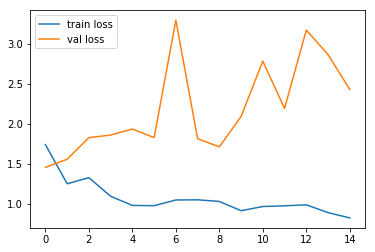

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

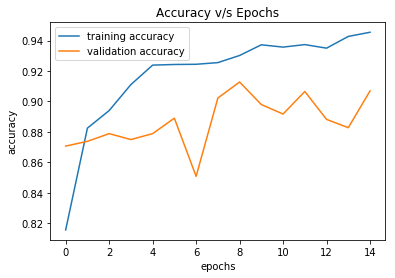

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')